# Convolutional Architecture
## Best model summary at the bottom

Let's now have a look at how a convolutional architecure preforms on the non reduced dataset

In [1]:
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import time

In [2]:
#Import datasets
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

xtrshape = np.shape(X_train)
xteshape = np.shape(X_test)

X_train = X_train.reshape((xtrshape[0], xtrshape[1], xtrshape[2],1))
X_test = X_test.reshape((xteshape[0], xteshape[1], xteshape[2],1))

#Define epochs and batch size
epochs = 10
batch_size=120

In [3]:
#Function to plot the accuracy and loss
def histoplot(data, reduced, modelnum):
    #Set figure size:
    plt.figure(figsize=(15,6))
    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(data.history['accuracy'])
    plt.plot(data.history['val_accuracy'])
    plt.title('model' + str(modelnum) + ' accuracy for ' + reduced + ' dataset')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    plt.subplot(122)
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.title('model' + str(modelnum) + ' loss for ' + reduced + ' dataset')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Model 1
Lets start of with a very simple architecture and use a single Conv2D layer and one MaxPooling layer:

In [29]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(40,40,1)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [30]:
start_time = time.time()
hist_conv1 = model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))
duration = (time.time() - start_time)

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 23s 1ms/sample - loss: 0.1752 - accuracy: 0.9745 - val_loss: 0.0280 - val_accuracy: 0.9879
Epoch 2/10
19449/19449 [==============================] - 22s 1ms/sample - loss: 0.0153 - accuracy: 0.9942 - val_loss: 0.0141 - val_accuracy: 0.9945
Epoch 3/10
19449/19449 [==============================] - 22s 1ms/sample - loss: 0.0119 - accuracy: 0.9948 - val_loss: 0.0105 - val_accuracy: 0.9954
Epoch 4/10
19449/19449 [==============================] - 22s 1ms/sample - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0099 - val_accuracy: 0.9963
Epoch 5/10
19449/19449 [==============================] - 25s 1ms/sample - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0095 - val_accuracy: 0.9966
Epoch 6/10
19449/19449 [==============================] - 25s 1ms/sample - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0151 - val_accuracy: 0.9944
Epoch 7/10
19449/19449 [==============================] -

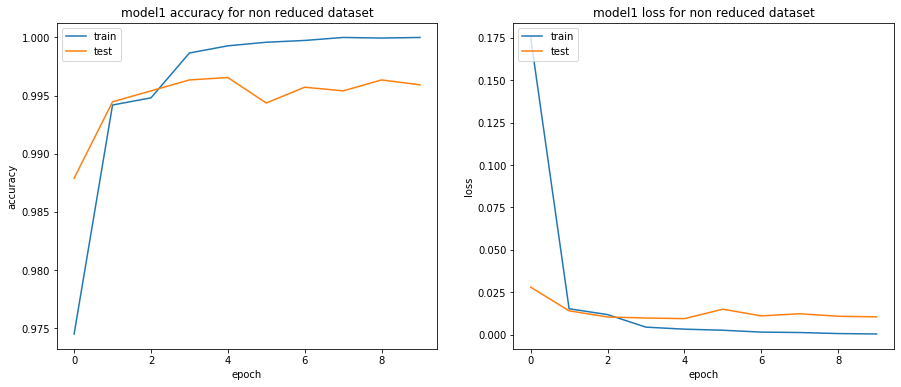

Training took: 231.21676588058472s


In [31]:
histoplot(hist_conv1, "non reduced", 1)
print("Training took: " + str(duration) + "s")

First things first, the training took extremely long compaired a model (more than 10 times as long) with only dense layers. However, this architecture preformes extremely well. The problem is that the model is not really imroving over time. This is why I will try out a simpler architecture to reduce computational time and include a dropout layer to reduce overfitting
## Model 2:

In [33]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(40,40,1)))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model2.add(Flatten())
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [34]:
start_time = time.time()
hist_conv2 = model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))
duration = (time.time() - start_time)

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 14s 706us/sample - loss: 0.0660 - accuracy: 0.9687 - val_loss: 0.0313 - val_accuracy: 0.9867
Epoch 2/10
19449/19449 [==============================] - 13s 652us/sample - loss: 0.0320 - accuracy: 0.9883 - val_loss: 0.0319 - val_accuracy: 0.9859
Epoch 3/10
19449/19449 [==============================] - 13s 660us/sample - loss: 0.0275 - accuracy: 0.9905 - val_loss: 0.0324 - val_accuracy: 0.9868
Epoch 4/10
19449/19449 [==============================] - 13s 656us/sample - loss: 0.0271 - accuracy: 0.9875 - val_loss: 0.0124 - val_accuracy: 0.9956
Epoch 5/10
19449/19449 [==============================] - 13s 656us/sample - loss: 0.0280 - accuracy: 0.9846 - val_loss: 0.0180 - val_accuracy: 0.9933
Epoch 6/10
19449/19449 [==============================] - 13s 657us/sample - loss: 0.0197 - accuracy: 0.9911 - val_loss: 0.0164 - val_accuracy: 0.9948
Epoch 7/10
19449/19449 [=====================

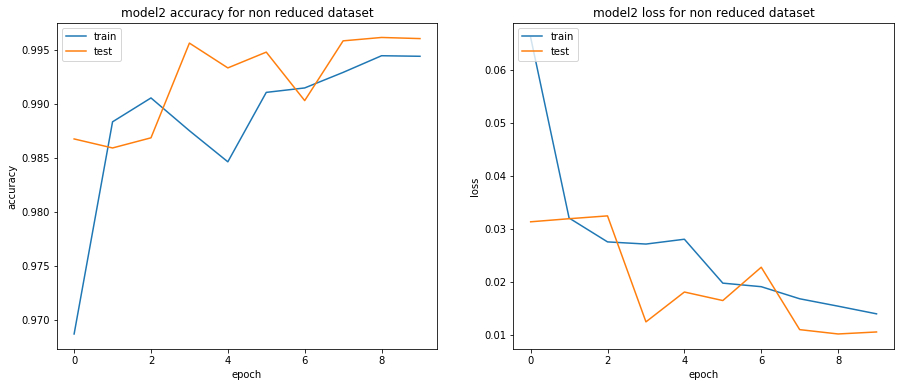

Training took: 130.00209283828735s


In [35]:
histoplot(hist_conv2, "non reduced", 2)
print("Training took: " + str(duration) + "s")

Val accuracy and loss basically stayed the same. However, with this simpler structure computational time has been reduced slightely. Finally, let's try an even simpler model with less convolutional layers and less desne neurons:

In [36]:
model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(40,40,1)))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [37]:
start_time = time.time()
hist_conv3 = model3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))
duration = (time.time() - start_time)

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 17s 874us/sample - loss: 0.1314 - accuracy: 0.9675 - val_loss: 0.0559 - val_accuracy: 0.9706
Epoch 2/10
19449/19449 [==============================] - 17s 848us/sample - loss: 0.0193 - accuracy: 0.9917 - val_loss: 0.0117 - val_accuracy: 0.9956
Epoch 3/10
19449/19449 [==============================] - 17s 864us/sample - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0355 - val_accuracy: 0.9859
Epoch 4/10
19449/19449 [==============================] - 18s 923us/sample - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0110 - val_accuracy: 0.9960
Epoch 5/10
19449/19449 [==============================] - 17s 892us/sample - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0136 - val_accuracy: 0.9939
Epoch 6/10
19449/19449 [==============================] - 17s 869us/sample - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0106 - val_accuracy: 0.9951
Epoch 7/10
19449/19449 [=====================

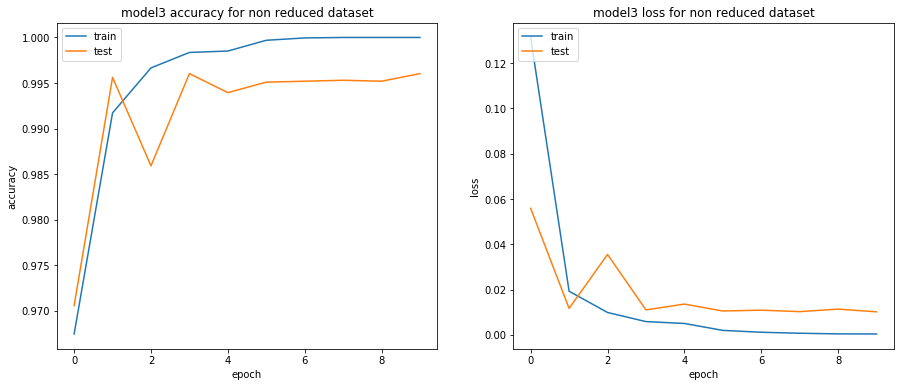

Training took: 170.004634141922s


In [38]:
histoplot(hist_conv3, "non reduced", 3)
print("Training took: " + str(duration) + "s")

The model is still able to predict the the phase very reliable, with about half the computational cost. To combate the 100 test accuracy we introduce a dropout layer:

In [39]:
model4 = Sequential()
model4.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(40,40,1)))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model4.add(Flatten())
model4.add(Dense(5, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [40]:
start_time = time.time()
hist_conv4 = model4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))
duration = (time.time() - start_time)

Train on 19449 samples, validate on 9580 samples
Epoch 1/10
19449/19449 [==============================] - 13s 693us/sample - loss: 0.1579 - accuracy: 0.9164 - val_loss: 0.0336 - val_accuracy: 0.9830
Epoch 2/10
19449/19449 [==============================] - 13s 652us/sample - loss: 0.1067 - accuracy: 0.9325 - val_loss: 0.0158 - val_accuracy: 0.9963
Epoch 3/10
19449/19449 [==============================] - 13s 648us/sample - loss: 0.0897 - accuracy: 0.9318 - val_loss: 0.0150 - val_accuracy: 0.9946
Epoch 4/10
19449/19449 [==============================] - 13s 678us/sample - loss: 0.0746 - accuracy: 0.9571 - val_loss: 0.0181 - val_accuracy: 0.9922
Epoch 5/10
19449/19449 [==============================] - 14s 709us/sample - loss: 0.0720 - accuracy: 0.9636 - val_loss: 0.0110 - val_accuracy: 0.9961
Epoch 6/10
19449/19449 [==============================] - 13s 677us/sample - loss: 0.0666 - accuracy: 0.9678 - val_loss: 0.0130 - val_accuracy: 0.9954
Epoch 7/10
19449/19449 [=====================

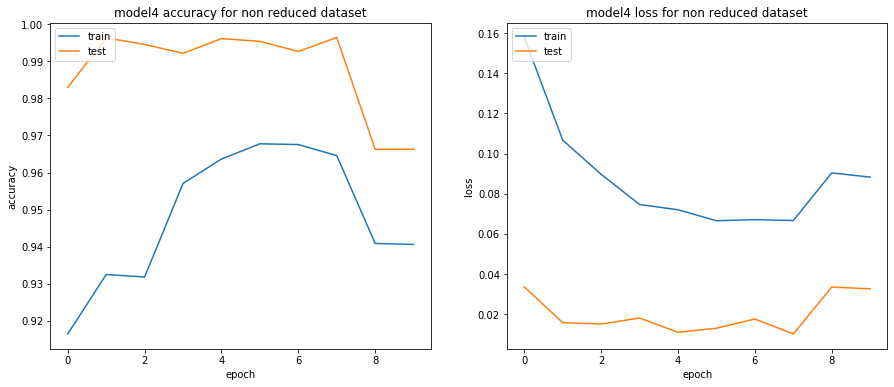

Training took: 133.91995096206665s


In [41]:
histoplot(hist_conv4, "non reduced", 4)
print("Training took: " + str(duration) + "s")

This performed a little worse than model 3, but overfitting was reduced.

In [42]:
model5 = Sequential()
model5.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(40,40,1)))
model5.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))
model5.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model5.add(Flatten())
model5.add(Dense(5, activation='relu'))
model5.add(Dropout(rate=0.2))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [44]:
start_time = time.time()
hist_conv5 = model5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))
duration = (time.time() - start_time)

Train on 19449 samples, validate on 9580 samples
Epoch 1/5
19449/19449 [==============================] - 33s 2ms/sample - loss: 0.0748 - accuracy: 0.9599 - val_loss: 0.0190 - val_accuracy: 0.9945
Epoch 2/5
19449/19449 [==============================] - 32s 2ms/sample - loss: 0.0629 - accuracy: 0.9846 - val_loss: 0.0134 - val_accuracy: 0.9956
Epoch 3/5
19449/19449 [==============================] - 32s 2ms/sample - loss: 0.0611 - accuracy: 0.9850 - val_loss: 0.0131 - val_accuracy: 0.9952
Epoch 4/5
19449/19449 [==============================] - 33s 2ms/sample - loss: 0.0519 - accuracy: 0.9882 - val_loss: 0.0127 - val_accuracy: 0.9949
Epoch 5/5
19449/19449 [==============================] - 33s 2ms/sample - loss: 0.0531 - accuracy: 0.9868 - val_loss: 0.0173 - val_accuracy: 0.9923


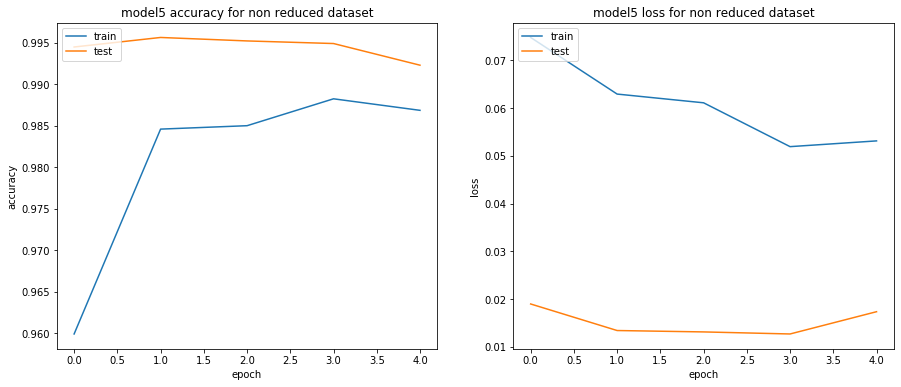

Training took: 163.98139595985413s


In [45]:
histoplot(hist_conv5, "non reduced", 5)
print("Training took: " + str(duration) + "s")

## To conclude:
Model 2 has performed the best

In [19]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 38, 38, 16)        160       
_________________________________________________________________
flatten_4 (Flatten)          (None, 23104)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 115525    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 115,691
Trainable params: 115,691
Non-trainable params: 0
_________________________________________________________________


In [46]:
model2.save("Conv_NonReduced_Data")

INFO:tensorflow:Assets written to: Conv_NonReduced_Data/assets
